In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [21]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [22]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [23]:
predicted_graph = pc_chen(partial_corr_test, ts, 4, 0.05)

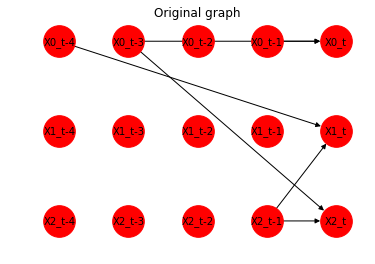

In [24]:
plt.title('Original graph')
generator.draw_graph()

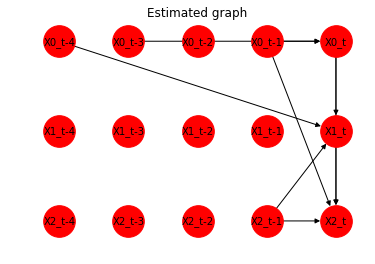

In [25]:
plt.title("Estimated graph")
draw_graph(predicted_graph, dimensions, max_p)

In [26]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph), index=[0])

,accuracy,f1-score,matthews_corrcoef
0,0.97619,0.666667,0.669344


In [73]:
p_ranking, ic_scores = var_order_select(ts, drop=False)

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [74]:
pd.DataFrame(p_ranking)

,aic,bic,fpe,hqic
0,17,17,17,17
1,15,15,15,15
2,14,14,14,14
3,6,6,6,6
4,18,18,18,18
5,16,16,16,16
6,7,7,7,7
7,11,11,11,11
8,12,12,12,12
9,5,5,5,5


In [75]:
pd.DataFrame(ic_scores)

,aic,bic,fpe,hqic
0,-inf,-inf,0.000000e+00,-inf
1,-inf,-inf,0.000000e+00,-inf
2,-inf,-inf,0.000000e+00,-inf
3,-inf,-inf,0.000000e+00,-inf
4,-inf,-inf,0.000000e+00,-inf
5,-inf,-inf,0.000000e+00,-inf
6,-72.068482,-72.020812,5.004447e-32,-72.052345
7,-72.060464,-71.986791,5.050796e-32,-72.035524
8,-72.058892,-71.978719,5.060264e-32,-72.031751
9,-71.379313,-71.344643,9.963191e-32,-71.367576
